# Lab 1 - Julia Basics
**Due**: Monday, 1/30 by 1:00pm.

Make sure you include your name and ID below for submission. <br>
**Name**: Parin Bhaduri <br>
**ID**: pbb62

## Contents

---

## Introduction

### Julia

[Julia](https://julialang.org) is an up-and-coming language, originally developed for scientific programming. While learning a new programming language always has its hiccups, the good news is that if you've programmed in a high-level language such as Python or MATLAB, most Julia concepts should look familiar. This notebook will guide you through the basics of writing Julia code and where to look for help. It was adapted from materials by Patrick Applegate ([Risk Analysis in the Earth Sciences](https://leanpub.com/raes)), [Tony Wong](https://tonyewong.github.io/), and [Antonia Hadjimichael](https://www.hadjimichael.info/).

### Jupyter Notebooks

Jupyter notebooks integrate text and equations in Markdown with Julia (or Python, or R) code. To do this, Jupyter notebooks consist of two types of "cells": code cells and Markdown (text) cells.

Click once on this section of text. A box will appear around this text (and some areas above/below it) - all of that is within this cell.

Markdown is a text markup framework for formatting language that makes things look pretty when viewed across different platforms: web browsers, notebooks, and so forth. Text written in Markdown can also include hyperlinks, LaTeX equations, section headers, and images, among other features (most of [the course website](https://viveks.me/climate-risk-analysis) and the lecture notes were all written in Markdown!). [Here is a basic Markdown cheat sheet](https://www.markdownguide.org/cheat-sheet/).

What you are looking at right now is the formatted text after the Markdown is processed. To see the raw Markdown, do one of:
- press `Enter` while that cell is selected, or
- double-click on that cell.

A couple of the features you will see in this Markdown cell:
* The `---` command creates a horizontal line. This is also nice for separating sections.
* Backticks (`` `...` ``) can be used to format and highlight code, keystrokes, etc.
* The `#` sign is used to create a new section header; two `#` signs (`##`) is used to create a new subsection header; `###` creates a subsubsection; more than that and you're just showing off.
- You can create a bulleted list by using the asterisk `*` or a dash `-` and a space.
- You can create regular text by just typing as usual.
- You can create bold-faced text by wrapping it with two asterisks on either side (see the words "Markdown" and "code" above).
- To create a new paragraph, you must include a blank line between the old and new paragraphs.

At this point you might be wondering how to turn this cell back into the fully formatted Markdown text instead of the raw Markdown you're probably still looking at. You have a couple of options, depending on your platform, but the most consistent is to type `Shift + Enter` to **execute** the cell (this is also how to run code, but more on that later).

Additionally, you will frequently need to create new cells in your Jupyter notebooks. How you do this will depend on how you interact with the notebook, but try to figure this out now.

One tip is to think carefully about what bits of code should be in the same cell, as you typically only see output from the last command in a cell. For example, compare the following:

In [1]:
x = 5
sin(x)

-0.9589242746631385

with

In [2]:
x = 5

5

In [3]:
sin(x)

-0.9589242746631385

In Julia, you can also suppress the output of a command with a semi-colon:

In [4]:
x = 5;

which can help if you want to split some code out for clarity or to insert some text prior to it, but don't want to clutter the notebook with its output.

For code cells, to execute the commands within the cell, we also press `Shift+Enter`.

Finally, **make sure that you evaluate all of the code cells in order before submitting**. One bad outcome with notebooks occurs when cells are evaluated out of order, so fixed bugs and edits in previous cells do not get a chance to propagate down. You can do this with the `Run All` command in whichever interface you're using to edit your notebook.

---

## Formatting Math

It will often be helpful to include nicely-formatted mathematics in a notebook. Markdown accomodates this using LaTeX syntax. A LaTeX cheatsheet is available [on the class website](https://viveks.me/climate-risk-analysis/resources/#latex_syntax), and many other guides exist online. Vivek also has a book on LaTeX that he can lend out if it would be helpful.

Below is an example of a formatted equation for a time series $x_t$, with the random noise $\varepsilon_t$ distributed according to a normal distribution with mean 0 and standard deviation 2.

\begin{equation}
x_{t+1} = 0.7 x_t + \varepsilon_t, \quad \varepsilon_t \sim N(0, 2)
\end{equation}

---

## A Basic Julia Script

Let's look at some code which implements the time series model above and plots different realizations, as well as a histogram of the end-time values. We'll break down each component to understand the syntax and how it all fits together.

### Package Management

At the beginning of each Julia script or notebook, you should load the `Pkg` package manager. This allows you to ensure that consistent package values are used, improving reproducibility and reducing the chance that unexpected errors might emerge. We do this with the `import Pkg` command.

Basic use of the `Pkg` package manager involves the following commands:
- `Pkg.activate(dir)` loads the environment file (`Project.toml`) and sets this as the active environment. Any packages which are added to or removed will impact this environment, not any (including the "default" system-wide Julia installation).
- `Pkg.instantiate()` createst the environment manifest (`Manifest.toml`) if it does not exist. This stores all of the needed packages, including dependencies, and their installed versions. If any package (or the correct versions) are not installed, this will occur at this stage.
- `Pkg.add("pkg")` adds `pkg.jl` to the environment if it is not already there.
- `Pkg.remove("pkg")` removes `pkg.jl` from the environment. This is unlikely to be used in this class.
- `Pkg.status()` prints out information about the current environment.

The only other interesting thing about the below code cell is the use of the `@__DIR__` macro. This references the directory that the file is in, so if `Project.toml` and the `.ipynb` or `.jl` file are in the same directory, this will always load the correct environment (and can be modified if the files are in different subdirectories). Use this instead of hard-coding a path, which may not be the same on different systems.

In [5]:
# load project environment
import Pkg # load the Pkg package manager
Pkg.activate(@__DIR__) # activate the environment in the directory of the script file
Pkg.instantiate() # make sure all of the needed packages are installed with correct versions

  Activating project at `~/Library/CloudStorage/OneDrive-CornellUniversity/Coding-Assignments/BEE Climate Risk Analysis/Labs/lab01`


In [6]:
Pkg.status()

      Status `~/Library/CloudStorage/OneDrive-CornellUniversity/Coding-Assignments/BEE Climate Risk Analysis/Labs/lab01/Project.toml`
  [31c24e10] Distributions v0.25.80
  [7073ff75] IJulia v1.24.0
  [91a5bcdd] Plots v1.38.2
  [9a3f8284] Random


To load packages which have been installed in the environment, use the `using` command. Below, we load `Random.jl`, which manages random number generator and `Distributions.jl`, which provides a common interface for interacting with probability distributions.

**Note**: A future lab will focus more on `Distributions.jl`; here we're only using it to sample random numbers from a normal distribution, so don't worry too much about what we can do with it.

In [7]:
# load needed packages
using Random # package to manage random number generation, including seeds
using Distributions # package for working with probability distributions

We also want to load `Plots.jl`, which will let us make plots. Suppose we either hadn't added `Plots.jl` to the environment ahead of time or we didn't know if it was included, and didn't want an error.

In [8]:
#Pkg.add("Plots") # add Plots.jl to the project if it was not already present
using Plots # load Plots package to be able to produce plots

There is no downside to `Pkg.add` if you are unsure if a package has been added; it will not throw an error if the package is already present.

### Setting Seeds

When working with random number generation, it is helpful to set a *seed* to produce the same sequence of numbers is produced. This ensures reproducibility and makes debugging easier.

![XKCD Cartoon 221 about random number generation](https://imgs.xkcd.com/comics/random_number.png) <br>
*Credit*: [XKCD #221](https://xkcd.com/221/)

In Julia, we use `Random.seed!()` to seed the random number generator. The `!` at the end is important: these are used to denote functions which change (or mutate) their inputs, rather than returning a copy.

In [9]:
# set seed for repeating random number generation
Random.seed!(1)

TaskLocalRNG()

### Writing the Core Function

While many problems can be solved by writing a sequence of commands in a script, there are often difficult to reuse and debug. Copying-and-pasting sections of code also drastically increases the probability of bugs, as you may forget to make changes to some of the repeated sections. I *highly* recommend writing as much of your code as possible as functions, and to definitely do so if you're using the same code multiple times. [This is also in the Julia style guide](https://docs.julialang.org/en/v1/manual/style-guide/#Write-functions,-not-just-scripts), particularly as Julia's optimization makes function evaluation run faster than top-level code commands.

With that in mind, while we could write a `for` loop at top level to produce a realization of our time series, we will instead write a function wrapping the loop evaluation and returning the realizations. This also pre-empts any issues related to variable scope (which are not worth getting into here, but can cause headaches down the road).

In [10]:
# function to produce N time-series realizations based on the above parameters
function run_time_series(N, T, x₀, μ, σ)
    # sample noise values from a normal distribution
    noise_dist = Normal(μ, σ) # create distribution object
    ε = rand(noise_dist, (N, T)) # sample N x T random values from distribution

    # preallocate memory for time series outputs
    x = zeros(N, T+1) # produce an N x (T+1) matrix of zeros
    x[:, 1] .= x₀ # Set the initial value: note that Julia indexing start at 1, not zero!

    # loop through time steps and evaluate time series model
    for t in 2:T+1
        x[:, t] = 0.7 .* x[:, t-1] + ε[:, t-1]
    end

    # return time series values
    return x
end

run_time_series (generic function with 1 method)

One feature of the above code is the occasional decimal `.` in front of several operators, such as in `x[:, 1] .= x₀`. The issue is that a command like `x[:, 1] = x₀` is ambiguous: you might want to set every element of `x[:, 1]` to `x₀`, or you might only be trying to get a single value and have made a mistake. You could make this more clear with a loop, but that adds extra reading and writing complexity to the code. Julia addresses this ambiguity through *broadcasting*, which compactly says that you want to evaluate the command element-wise ("broadcasting") over the array. To broadcast a command over an array, put a decimal `.`. For example, a dot product in Julia is given by `sum(x .* y)`, so the multiplication is broadcasted over the input vectors `x` and `y` element-wise, before the resulting vector is summed.

Also note the use of the `end` keyword to close the `for` and `function` blocks (also `if`-`else`-`elseif` blocks, which we aren't using here). Forgetting `end` is a common source of bugs, so use indentations to your advantage to make it clear if you've `end`ed a block.

### Setting Parameter Values

Next, we need to set some parameter values for our function call. We do this using the `=` operator.

One neat thing about Julia is that we can use a variety of subscripts, superscripts, and Greek letters (among other things) as variable names. This is not necessary (writing out `sigma` is just as legible as using the Greek letter `σ`), but may be more compact and more directly translate equations. These characters are obtained with tab-complete: to obtain `σ`, write out `\sigma` and hit `Tab`. With notebooks, this works easiest in an IDE like VS Code, and works for [any of the characters listed here](https://docs.julialang.org/en/v1/manual/unicode-input/).

In [11]:
# set variable values
T = 25 # number of time steps
x₀ = 3 # initial value
μ = 0 # normal distribution mean
σ = 2 # normal distribution standard deviation
N = 1000 # number of realizations

1000

### Running the Function and Displaying Output

Now we can run the function, which will yield $N$ realizations of our time series, each of which is of length $T+1$ (including the initial value).

In [12]:
x = run_time_series(N, T, x₀, μ, σ)

1000×26 Matrix{Float64}:
 3.0   1.95883     2.27857    2.34684   …  -3.56512    -6.44286   -4.04146
 3.0   3.16295     1.60542   -0.840693     -1.03829    -0.108063   0.660182
 3.0   0.486295   -2.56737   -2.39103       1.95986     1.46341    1.90135
 3.0   7.01398     6.76512    8.20527      -3.10041     3.12248    0.874753
 3.0   4.42975    -0.63549   -2.36954       1.62872     1.58746    3.35009
 3.0   2.63513     1.15073   -1.92579   …   3.23633     2.575      0.713741
 3.0   5.59987     3.22358    1.13338      -3.73825    -4.28901   -4.58845
 3.0   0.447958   -1.97949    1.27999       2.03576    -0.284422   1.4426
 3.0   0.0144952  -2.58173   -0.773512     -1.54321    -3.02461   -4.12335
 3.0   1.44173     1.23578    0.887647     -5.77287    -7.26747   -4.74929
 3.0   1.1355     -2.262     -2.99499   …   1.25497     1.44269    2.72767
 3.0   4.46449     3.27737    2.13538      -0.0362571   2.11477    4.33677
 3.0   3.06138     5.35613    4.43149      -1.40655    -3.13387    2.1071

You can also use the `@show` macro to clean up the output and explicitly show the variable name, but don't do this for output that is too large; it may not truncate to fit (as the previous cell does).

In [13]:
@show x[1:10, T+1]; # the semi-colon here stops double-printing, which is an issue in Jupyter when using @show

x[1:10, T + 1] = [-4.041464060361107, 0.6601821636270649, 1.9013534842528652, 0.8747526193853039, 3.3500894527592164, 0.7137407209342408, -4.588449860933408, 1.4426032194165082, -4.123348608399533, -4.74928555056034]


### Plotting

Finally, let's plot our output. We will produce two plots: the first will plot the first 10 realizations as lines, and the second will be a histogram of all the end-period values, with a red vertical line to indicate the mean.

We won't spend too much time here on the details of working with `Plots.jl`, but there is an [overview tutorial](https://viveks.me/climate-risk-analysis/tutorials/julia-plots/) on the class website and [official documentation](https://docs.juliaplots.org/stable/). However, the basic usage here is important to understand, so please ask if you're unsure what a particular argument does!

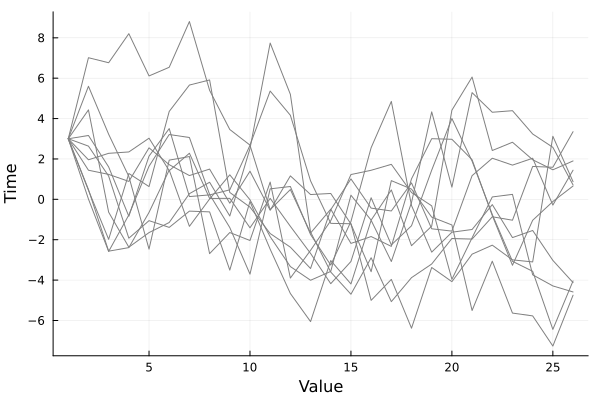

In [14]:
plot(x[1:10, :]', ylabel = "Time", xlabel = "Value", legend=false, color=:grey) # make line plot of first 10 realizations with grey lines and no legend; need to transpose array x as Plots wants to treat each column as its own series

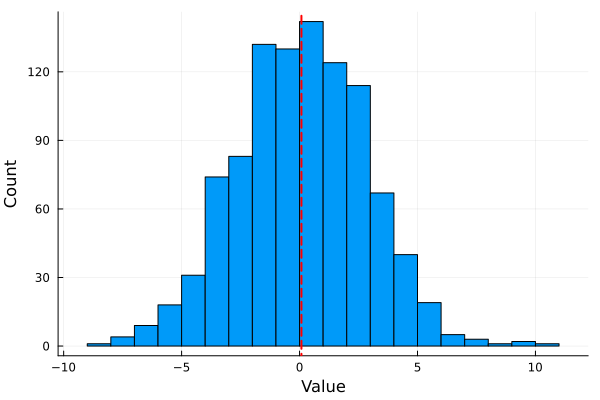

In [15]:
histogram(x[:, T+1], xlabel = "Value", ylabel = "Count", legend=false) # # make basic histogram
meanval = mean(x[:, T+1]) # get mean
vline!([meanval], color=:red, linestyle=:dash, lw=2)

---

## Looking For Help

There is no shame in using Google, or other resources, for help when programming. There are many, many times when you can't quite get the syntax to work, can't quite figure out the right package or command to use, or are feeling too lazy or overwhelmed (I'm not judging either of those!) to dig through the documentation. [Stack Overflow](https://stackoverflow.com/) is a treasure trove of answers, as are the [official Julia forum](https://discourse.julialang.org/) and the [Julia Subreddit](https://www.reddit.com/r/Julia/). You are also highly encouraged to post on [Ed Discussion](https://us.edstem.org), though getting a response might be less immediate. Just be mindful that to get good answers, you have to [help people help you](https://stackoverflow.com/help/how-to-ask), and **make sure to give credit to any resources that were helpful**!

![XKCD Cartoon 979 on looking for help](https://imgs.xkcd.com/comics/wisdom_of_the_ancients.png) <br>
*Credit*: [XKCD #979](https://xkcd.com/979/)

---

## Exercises

Use your understanding of Julia syntax to complete the following (hopefully short) exercises. [Convert your completed notebook to a PDF](https://viveks.me/climate-risk-analysis/assignments/workflow/#converting_notebooks_to_pdf) and submit it to the Gradescope Assignment "Lab 1".

**Remember to**:
- Evaluate all of your code cells, in order (using a `Run All` command). This will make sure all output is visible and that the code cells were evaluated in the correct order.
- Tag each of the problems when you submit to Gradescope; a 10% penalty will be deducted if this is not done.

### Exercise 1 (10 points)

Adapt the previous code to obtain 10,000 realizations of the same time series for 10 time steps. Plot a histogram of the end-period values.

In [16]:
# set variable values
T = 10 # number of time steps
x₀ = 3 # initial value
μ = 0 # normal distribution mean
σ = 2 # normal distribution standard deviation
N = 10000 # number of realizations

y = run_time_series(N, T, x₀, μ, σ)

10000×11 Matrix{Float64}:
 3.0   1.66663    0.517028   1.51345   …   0.795361  -2.00829    -0.526156
 3.0  -2.38786   -3.50644   -4.14267       1.51276   -1.76489    -1.81039
 3.0  -0.846602  -2.00256    2.95721       3.64163    1.93572     4.20801
 3.0   1.7077     1.16635    0.829973     -0.411789   2.57391     0.762914
 3.0  -0.58323   -1.503     -1.10076      -0.281293  -1.44413    -1.74855
 3.0   2.33711    2.54884    0.135723  …  -0.513271   0.122155   -3.03027
 3.0   1.00827   -1.66199   -0.294277     -5.52619   -3.35243    -2.0764
 3.0   5.32676    3.63863    2.76618       3.07693    1.4126      0.56584
 3.0  -0.193924  -2.5567    -0.440495      2.93096    3.98875     4.11863
 3.0   3.89456   -1.29888   -2.17279      -0.289774   0.801453    0.911114
 3.0   3.87695    3.49104    4.01945   …   1.87935    0.226873   -0.584386
 3.0   1.89237    2.21432    1.33517       2.75059    6.25785     2.82224
 3.0   3.49058    3.81007    3.48592      -1.26344   -1.94434    -1.26613
 ⋮       

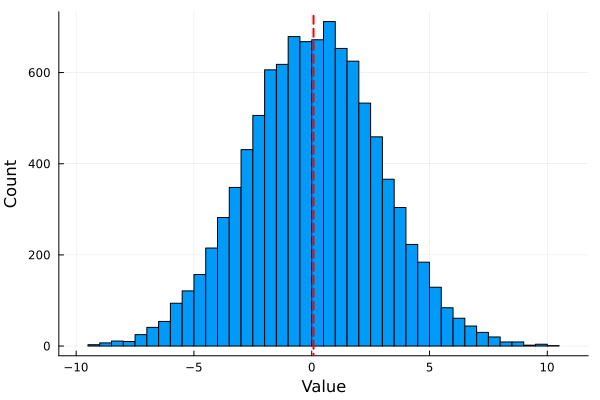

In [17]:
histogram(y[:, T+1], xlabel = "Value", ylabel = "Count", legend=false) # # make basic histogram
meanval = mean(y[:, T+1]) # get mean
vline!([meanval], color=:red, linestyle=:dash, lw=2)

### Exercise 2 (25 points)

This problem involves implementing Newton's method for computing square roots; it was shamelessly copied from MIT's [Introduction to Computational Thinking](https://computationalthinking.mit.edu/Spring21/hw0/). You will use a [`while` loop](https://docs.julialang.org/en/v1/manual/control-flow/#man-loops) instead of the `for` loop above.

Implement the following algorithm in a function `newton_sqrt`:

Given $x > 0$:
1. Take a guess $a$.
2. Divide $x$ by $a$.
3. Update $a$ as the average of $x/a$ and $a$.
4. Repeat until $x/a$ is within a tolerance of $\varepsilon$ from $a$.
5. Return $a \approx \sqrt{x}$.

Use your `newton_sqrt` function to compute $\sqrt{2}$ to within a tolerance of $\varepsilon = 0.01$

In [18]:
function newton_sqrt(x, ϵ)
    a = rand()
    div = x/a
    a = (div+a)/2
    while abs(div-a) > ϵ
        div = x/a
        a = (div+a)/2
    end
    return a
end


newton_sqrt (generic function with 1 method)

In [19]:
newton_sqrt(2, 0.01)

1.4142135649047014

In [20]:
sqrt(2)

1.4142135623730951

### Exercise 3 (15 points)

Sample 100 variables from a normal distribution with mean 1 and standard deviation 5, e.g. $x_i \sim N(1, 5)$ (use similar syntax from the sample code above). Write a function `mean_loop` to compute the mean of this vector $\bar{x}$ using a `for` loop, and use broadcasting to subtract $\bar{x}$ from each element of your vector of sampled variables.

In [21]:

function mean_loop(vector)
    # finnd number of values in vector
    vec_size = length(vector) 
    #Add values of vector
    sum_vec = 0
    for i in vector
        sum_vec += i 
    end
    #Find average
    vec_mean = sum_vec / vec_size
    #Subtract average from all values in vector
    new_vec = vector .- vec_mean
    return new_vec
end

mean_loop (generic function with 1 method)

In [22]:
using Distributions
#Create 100 variable sample
dist = Normal(1,5)
sample = rand(dist, 100)

#Apply function to sample
new_sample = mean_loop(sample)

100-element Vector{Float64}:
 -1.6556386563416283
  4.762305488409085
 -3.7813083548858244
 -8.97348923252468
  3.044809772391397
 -7.409399835077556
  0.731318900907363
 -1.441526371569775
 -8.428156848188616
  6.909532720226416
 -8.930931335845482
  1.8321688189985
 -7.835707403881626
  ⋮
 -4.57048345398322
  6.143164709764533
 -2.3815908408089794
 -8.877611728569303
  0.8590004772847738
  7.802613244430462
 -3.000066896198925
  3.2489756372474123
 -8.346567288759482
 -0.36697161056526084
 -3.4049890191680254
  0.6746893919351199

### References

Give credit to any consulted references here, whether they were your classmates, online resources, or anything else.